In [43]:
import pandas as pd
import requests

url = "https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/SegundoCorte/loan_approval_dataset.csv"
response = requests.get(url)
response.raise_for_status()

with open("loan_approval_dataset.csv", "wb") as f:
    f.write(response.content)
df=pd.read_csv("loan_approval_dataset.csv")
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

**Pregunta 1: Análisis Exploratorio de Datos (EDA)**

1. **Comprensión del Problema y los Datos:**  Antes de cualquier análisis técnico, es crucial entender el objetivo del proyecto y el significado de cada variable en el conjunto de datos.  Esto implica leer la documentación disponible, consultar con expertos en el dominio (si los hay) y definir claramente la variable objetivo y las métricas de éxito.  Herramientas:  Documentación del conjunto de datos, reuniones con stakeholders.

2. **Carga y Limpieza de Datos:**  Cargar los datos en un entorno de análisis (como Jupyter Notebook o Google Colab usando pandas) es el primer paso práctico. Luego, hay que limpiar los datos, lo cual implica:
    * **Manejo de valores faltantes:** Identificar y tratar los valores faltantes (NaN, NULL, etc.).  Opciones: eliminación de filas/columnas, imputación con la media/mediana/moda, o métodos más sofisticados como la imputación KNN.
    * **Tratamiento de datos atípicos (outliers):** Detectarlos usando diagramas de caja (box plots), histogramas, o métodos estadísticos. Se pueden eliminar, transformar o tratar de manera especial según el contexto.
    * **Corrección de errores tipográficos y datos inconsistentes:**  Revisar la consistencia de las categorías en variables categóricas, corregir errores de formato, etc.
    * **Transformación de variables:** Convertir tipos de datos (string a numérico, fechas a formatos adecuados), estandarizar unidades de medida y aplicar transformaciones como logaritmo o raíz cuadrada para normalizar la distribución de algunas variables si es necesario.
    Herramientas: Pandas, NumPy, Scikit-learn (para imputación).

3. **Análisis Univariado:** Explorar cada variable individualmente.
    * **Variables numéricas:** Histogramas, box plots, cálculos de estadísticas descriptivas (media, mediana, desviación estándar, percentiles, etc.) para entender la distribución de los datos.
    * **Variables categóricas:** Tablas de frecuencia, gráficos de barras para ver la proporción de cada categoría.
    Herramientas: Pandas, Matplotlib, Seaborn.

4. **Análisis Bivariado:** Examinar la relación entre pares de variables.
    * **Numéricas vs. Numéricas:** Gráficos de dispersión (scatter plots), correlaciones (Pearson, Spearman) para detectar patrones lineales o no lineales y la fuerza de la asociación.
    * **Numéricas vs. Categóricas:** Box plots, gráficos de violín para comparar la distribución de la variable numérica para cada categoría de la variable categórica.
    * **Categóricas vs. Categóricas:** Tablas de contingencia, mapas de calor para observar la relación entre las diferentes combinaciones de categorías.
    Herramientas: Pandas, Matplotlib, Seaborn.

5. **Análisis Multivariado:** Explorar relaciones entre múltiples variables simultáneamente.  
    * **Reducción de dimensionalidad (PCA, t-SNE):** Si se tienen muchas variables, aplicar técnicas para reducir el número de dimensiones y visualizar los datos en un espacio de menor dimensión.
    * **Análisis de correlaciones:**  Matrices de correlación para identificar grupos de variables altamente correlacionadas.
    Herramientas: Pandas, Scikit-learn (PCA, t-SNE), Matplotlib, Seaborn.

6. **Visualización:**  Utilizar gráficos informativos para comunicar los hallazgos del EDA.  Elegir los tipos de gráficos adecuados para cada tipo de variable y relación.
    Herramientas: Matplotlib, Seaborn, Plotly.

7. **Formulación de Hipótesis:**  Basándose en las observaciones del EDA, formular hipótesis sobre las relaciones entre variables y su impacto en la variable objetivo.  Estas hipótesis pueden luego ser probadas con modelos estadísticos.

En resumen, el EDA es un proceso iterativo que ayuda a comprender los datos, identificar problemas de calidad de los datos, y generar hipótesis para guiar la construcción del modelo.  Las herramientas mencionadas (Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn) son esenciales para este proceso en Python.


**Pregunta 2: Preprocesamiento de Datos**

**Valores Faltantes:**

* **Eliminación:** Si el porcentaje de valores faltantes es pequeño y aleatorio, se podrían eliminar las filas o columnas afectadas.  Sin embargo, esto puede resultar en pérdida de información valiosa, especialmente si la cantidad de datos faltantes es significativa.  Es preferible cuando se tiene un conjunto de datos muy grande o si la eliminación de los datos no afecta negativamente al modelo.
* **Imputación:**  Esta es una técnica más común y generalmente preferida.
    * **Media/Mediana/Moda:** Reemplazar los valores faltantes con la media (para variables numéricas continuas), mediana (para variables numéricas con outliers) o moda (para variables categóricas).  Este método es simple, pero puede sesgar los resultados si la cantidad de valores faltantes es alta.
    * **Imputación KNN:**  Este método considera los K vecinos más cercanos para estimar el valor faltante. Es una opción más robusta que la imputación con la media o la mediana, especialmente si los datos faltantes no son aleatorios.
    * **Imputación por modelo predictivo:**  Se puede construir un modelo predictivo para predecir los valores faltantes basados en las otras variables del conjunto de datos. Es una técnica avanzada pero puede ser muy precisa si se entrena adecuadamente.

**Valores Atípicos (Outliers):**

* **Identificación:** Utilizar métodos como diagramas de caja (box plots), histogramas o cálculo de puntuaciones Z para identificar valores que se desvían significativamente de la distribución general.
* **Eliminación:** Eliminar los outliers si se considera que son errores en la recolección de datos.  Sin embargo, en algunos casos, los outliers pueden ser valores reales con una interpretación válida, por lo que es importante tomar una decisión informada.
* **Transformación:**  Aplicar transformaciones a la variable, como logaritmo o raíz cuadrada, para reducir el impacto de los outliers en el análisis.
* **Winsorizing o Trimming:** Se establece un límite y se reemplaza los valores atípicos por el valor más próximo dentro del rango establecido, o se eliminan.
* **Modelos robustos:**  Usar modelos estadísticos o algoritmos de Machine Learning que sean menos sensibles a los outliers (por ejemplo, regresión robusta).


**Justificación:**

La elección de la técnica dependerá de varios factores, como la cantidad de valores faltantes o atípicos, la naturaleza de los datos y el objetivo del análisis.  Para datos faltantes, la imputación con KNN o un modelo predictivo suelen ser las mejores opciones, mientras que la eliminación es adecuada sólo si son pocos.  Para los outliers, la mejor estrategia podría ser utilizar métodos robustos, o transformar las variables si la naturaleza del outlier es debido a la escala, o la eliminación si son errores de captura de datos. Es fundamental justificar la técnica elegida en función de cada caso concreto, considerando el impacto de cada tratamiento en la posterior construcción del modelo.


**Pregunta 3: Modelos de Clasificación**

**Razones:**

* **Variable objetivo binaria:** La regresión logística es ideal para problemas de clasificación binaria, donde la variable objetivo tiene dos posibles resultados (aprobado o rechazado).  El modelo predice la probabilidad de que un préstamo sea aprobado, permitiendo establecer un umbral para clasificar la predicción.

* **Interpretabilidad:** La regresión logística ofrece una buena interpretabilidad.  Los coeficientes del modelo indican la influencia de cada variable predictora en la probabilidad de aprobación del préstamo.  Esto es crucial para entender qué factores son más importantes en la decisión de préstamo y para comunicar los resultados a stakeholders no técnicos.

* **Eficiencia computacional:**  Es relativamente simple y rápido de entrenar, incluso con conjuntos de datos grandes.

**Ventajas:**

* **Interpretabilidad:**  Fácil de entender y explicar los resultados.
* **Eficiencia:**  Relativamente rápido de entrenar y predecir.
* **Robustez:**  No es tan sensible a los outliers como algunos otros modelos.
* **Escalabilidad:**  Funciona bien con grandes conjuntos de datos.

**Desventajas:**

* **Asumciones:**  Asume una relación lineal entre las variables predictoras y el logaritmo de las probabilidades.  Si esta suposición no se cumple, la precisión del modelo puede disminuir.  En la práctica, transformaciones de variables o técnicas de ingeniería de características pueden ayudar a mitigar este problema.
* **No maneja bien relaciones no lineales complejas:** Si las relaciones entre las variables y la variable objetivo son altamente no lineales, otros modelos como las máquinas de vectores de soporte (SVM) o los árboles de decisión pueden ser más apropiados.  Sin embargo, la regresión logística puede combinarse con técnicas como la polinomialización de características para capturar cierta no linealidad.
* **Sensibilidad a valores atípicos en variables predictoras:**  Si bien es más robusto que algunos otros modelos, los valores extremos aún pueden afectar los coeficientes y, por lo tanto, las predicciones.  Un preprocesamiento adecuado para tratar estos valores atípicos es esencial.


En resumen, la regresión logística es un buen punto de partida para este problema debido a su simplicidad, interpretabilidad y eficiencia.  Si después de un análisis exploratorio se identifican complejidades no lineales importantes en los datos, se podrían explorar otros modelos más complejos.


**Pregunta 4: Desbalanceo de Clases**

El desbalanceo de clases ocurre en problemas de clasificación cuando una clase (o varias) tiene significativamente menos ejemplos que otras en el conjunto de datos de entrenamiento.  Esto es problemático porque los modelos de clasificación tienden a "aprender" a predecir la clase mayoritaria, ya que esta domina el proceso de entrenamiento.  Como consecuencia, el modelo puede tener una alta precisión general, pero una baja precisión en la clase minoritaria, lo cual puede ser más importante dependiendo del contexto del problema. Por ejemplo, si estamos detectando fraude, la clase "fraude" será mucho menor que "no fraude", y un modelo que predice "no fraude" para casi todos los casos tendría alta precisión general, pero sería inútil.


Para abordar el desbalanceo de clases, se pueden usar varias técnicas:

* **Sobremuestreo (Oversampling):** Crear copias de instancias de la clase minoritaria para balancear las proporciones de clases.  Sin embargo, puede llevar a sobreajuste.

* **Submuestreo (Undersampling):** Eliminar instancias de la clase mayoritaria.  Esto puede resultar en pérdida de información valiosa.

* **SMOTE (Synthetic Minority Over-sampling Technique):**  Una técnica de sobremuestreo que genera nuevas instancias sintéticas de la clase minoritaria.  En lugar de simplemente duplicar ejemplos existentes, SMOTE crea nuevos datos basados en la interpolación entre ejemplos existentes. Esto ayuda a evitar el sobreajuste y proporciona ejemplos más diversos de la clase minoritaria.

* **Técnicas de Costo Sensible:** Asignar costos diferentes a los errores de clasificación para cada clase.  Por ejemplo, un error en la clase minoritaria podría tener un costo mayor. Esto "penaliza" al modelo cuando se equivoca con la clase minoritaria.


SMOTE es una buena opción porque crea datos sintéticos en vez de replicar los existentes.  Esto ayuda a aumentar la diversidad de los datos de entrenamiento para la clase minoritaria sin simplemente duplicar puntos de datos existentes, lo que reduce el riesgo de sobreajuste. La selección de la técnica ideal depende de las características del dataset y de las necesidades del problema.


**Pregunta 5: Overfitting**

El *overfitting* (sobreajuste) en Machine Learning ocurre cuando un modelo se ajusta demasiado a los datos de entrenamiento, aprendiendo incluso el ruido y las fluctuaciones aleatorias presentes en ellos.  Como resultado, el modelo funciona muy bien con los datos de entrenamiento, pero su rendimiento disminuye significativamente cuando se enfrenta a nuevos datos desconocidos (datos de prueba o datos reales).  Es decir, el modelo ha memorizado los datos de entrenamiento en lugar de aprender los patrones generales subyacentes.

Puedes detectar el *overfitting* comparando el rendimiento del modelo en los conjuntos de entrenamiento y prueba.  Si la precisión o la puntuación del modelo es mucho mayor en el conjunto de entrenamiento que en el de prueba, es una señal clara de sobreajuste.  Otras señales incluyen una complejidad excesiva del modelo (por ejemplo, un árbol de decisión muy profundo o una red neuronal con demasiadas capas y neuronas), una gran varianza en el rendimiento del modelo con diferentes conjuntos de entrenamiento, o un rendimiento excelente en el conjunto de entrenamiento pero muy pobre en datos nuevos no vistos.

Para evitar el *overfitting* y mejorar la capacidad de generalización del modelo, puedes tomar varias medidas:

* **Aumentar la cantidad de datos de entrenamiento:** Más datos ayudan al modelo a aprender patrones más generales y robustos, reduciendo la influencia del ruido.

* **Simplificar el modelo:**  Reducir la complejidad del modelo puede prevenir que se ajuste demasiado a los detalles específicos de los datos de entrenamiento.  Por ejemplo, puedes usar un modelo más simple, reducir el número de parámetros en una red neuronal, o podar un árbol de decisión.

* **Regularización:**  Agregar términos de penalización a la función de costo del modelo para evitar que los coeficientes tomen valores muy grandes.  La regularización L1 (Lasso) y L2 (Ridge) son técnicas comunes.

* **Validación cruzada (Cross-validation):**  Dividir los datos en múltiples pliegues y entrenar el modelo en diferentes combinaciones de estos pliegues para obtener una estimación más robusta del rendimiento del modelo y evaluar su capacidad de generalización.  Esto ayuda a identificar si el modelo está sobreajustando a un subconjunto de datos específico.

* **Detención temprana (Early stopping):**  Monitorear el rendimiento del modelo en un conjunto de validación durante el entrenamiento y detener el entrenamiento cuando el rendimiento en el conjunto de validación comienza a disminuir, aun cuando el rendimiento en el conjunto de entrenamiento siga mejorando.

* **Dropout (en redes neuronales):**  Desactivar aleatoriamente neuronas durante el entrenamiento para evitar que las redes se especialicen demasiado en ciertas características.

* **Data augmentation:** aumentar artificialmente el tamaño del dataset de entrenamiento mediante la aplicación de pequeñas modificaciones a las instancias ya existentes (por ejemplo, rotar las imágenes o cambiar ligeramente sus colores).


En resumen, la clave para evitar el *overfitting* es encontrar un equilibrio entre la complejidad del modelo y la cantidad y calidad de los datos. Se debe buscar un modelo que se ajuste bien a los datos de entrenamiento sin capturar demasiado ruido, permitiendo que el modelo pueda generalizar a nuevos datos de manera efectiva.


Ejercicio 1: Análisis Descriptivo

In [44]:
import pandas as pd

numerical_cols = df.select_dtypes(include=['number'])

description = numerical_cols.describe()
print(description)

print("\n--- Additional Information ---")
print("Number of unique values per column:\n", numerical_cols.nunique())
print("\nMissing values per column:\n", numerical_cols.isnull().sum())

print("\n--- First few rows of the numerical columns ---")
print(numerical_cols.head())


           loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.20000

In [51]:
df.columns = df.columns.str.strip()
average_income = df['income_annum'].mean()
print(df.columns.tolist())


['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [52]:
average_income = df['income_annum'].mean()
print(f"Average annual income: {average_income}")

approved_loans = df[df['loan_status'] == 'Approved']
average_cibil_approved = approved_loans['cibil_score'].mean()
print(f"Average CIBIL score for approved loans: {average_cibil_approved}")

average_loan_term = df['loan_term'].mean()
print(f"Average loan term: {average_loan_term}")

Average annual income: 5059123.9166081045
Average CIBIL score for approved loans: nan
Average loan term: 10.900445069102835


Ejercicio 2: Preprocesamiento de Datos

In [53]:
df['education'] = df['education'].map({'Graduate': 1, 'Not Graduate': 0})

df['self_employed'] = df['self_employed'].map({'Yes': 1, 'No': 0})

for col in df.select_dtypes(include=['number']):
  if df[col].isnull().any():
    df[col] = df[col].fillna(df[col].mean())

Ejercicio 3: Análisis de Correlación

                          income_annum  loan_amount  cibil_score  \
income_annum                  1.000000     0.927470    -0.023034   
loan_amount                   0.927470     1.000000    -0.017035   
cibil_score                  -0.023034    -0.017035     1.000000   
residential_assets_value      0.636841     0.594596    -0.019947   
commercial_assets_value       0.640328     0.603188    -0.003769   

                          residential_assets_value  commercial_assets_value  
income_annum                              0.636841                 0.640328  
loan_amount                               0.594596                 0.603188  
cibil_score                              -0.019947                -0.003769  
residential_assets_value                  1.000000                 0.414786  
commercial_assets_value                   0.414786                 1.000000  


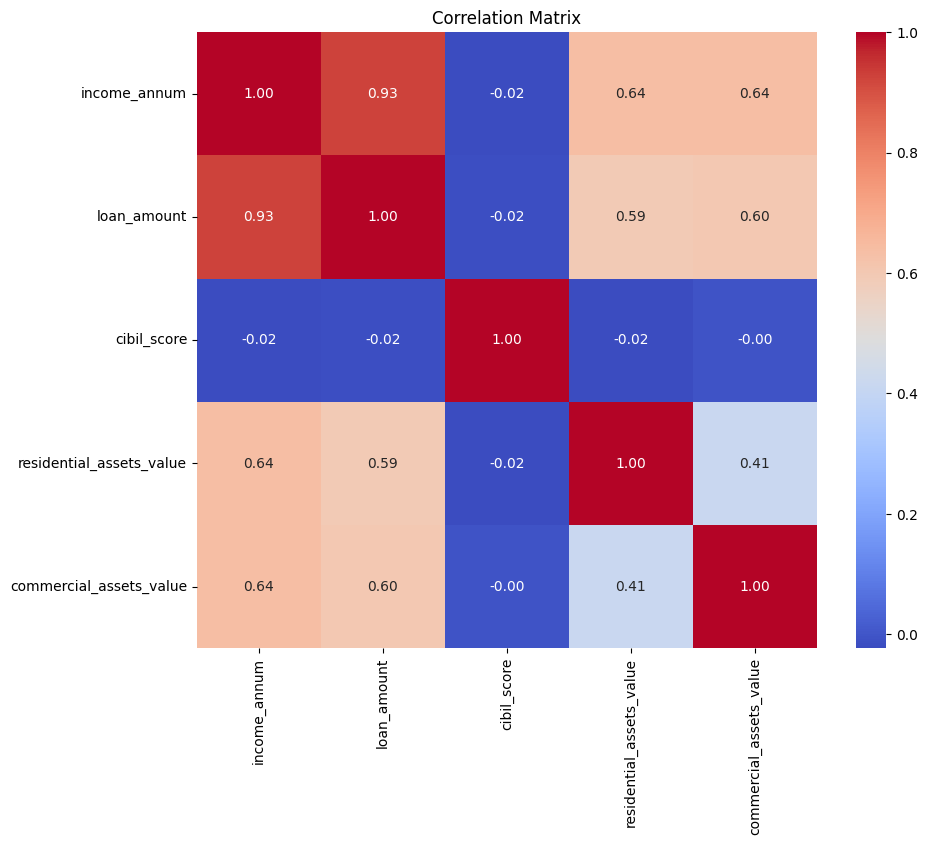

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df[['income_annum', 'loan_amount', 'cibil_score', 'residential_assets_value', 'commercial_assets_value']].corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Ejercicio 4: Comparación de Modelos de Clasificación

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

df = pd.read_csv("loan_approval_dataset.csv")

df.columns = df.columns.str.strip()

df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

df['education'] = df['education'].map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].map({'Yes': 1, 'No': 0})

imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols[numerical_cols != 'loan_id']
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

categorical_cols = ['education', 'self_employed']
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

Logistic Regression:
Accuracy: 0.8231850117096019
              precision    recall  f1-score   support

    Approved       0.82      0.92      0.87       536
    Rejected       0.83      0.66      0.74       318

    accuracy                           0.82       854
   macro avg       0.83      0.79      0.80       854
weighted avg       0.82      0.82      0.82       854


Decision Tree:
Accuracy: 0.9765807962529274
              precision    recall  f1-score   support

    Approved       0.98      0.99      0.98       536
    Rejected       0.97      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



In [68]:
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

print("\nClass Distribution:")
print(y_train.value_counts())

if y_train.value_counts().min() < y_train.value_counts().max() * 0.3 :
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print("\nClass Distribution After SMOTE:")
    print(y_train_resampled.value_counts())

    logreg_model.fit(X_train_resampled, y_train_resampled)
    logreg_pred = logreg_model.predict(X_test)

    dt_model.fit(X_train_resampled, y_train_resampled)
    dt_pred = dt_model.predict(X_test)

else:
    print("\nNo significant class imbalance detected.")

logreg_roc_auc = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])
dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])

print("\nLogistic Regression ROC AUC:", logreg_roc_auc)
print("Decision Tree ROC AUC:", dt_roc_auc)

print("\nLogistic Regression Train Accuracy:",accuracy_score(y_train,logreg_model.predict(X_train)))
print("Decision Tree Train Accuracy:",accuracy_score(y_train,dt_model.predict(X_train)))

print("\nDiscussion:")

if logreg_roc_auc > dt_roc_auc:
    print("Logistic Regression is the most suitable model.")
else:
    print("Decision Tree is the most suitable model.")

print("Based on ROC_AUC.  The model with the higher ROC AUC is generally preferred, as it indicates better discrimination between the classes.")

if accuracy_score(y_train,logreg_model.predict(X_train)) - accuracy_score(y_test,logreg_pred) > 0.1 :
    print("Logistic Regression shows evidence of overfitting.")
elif accuracy_score(y_train,dt_model.predict(X_train)) - accuracy_score(y_test,dt_pred) > 0.1 :
    print("Decision Tree shows evidence of overfitting.")
else:
    print("No significant evidence of overfitting for either model.")





Class Distribution:
loan_status
Approved    2120
Rejected    1295
Name: count, dtype: int64

No significant class imbalance detected.

Logistic Regression ROC AUC: 0.888939735285835
Decision Tree ROC AUC: 0.9736693889045339

Logistic Regression Train Accuracy: 0.8052708638360175
Decision Tree Train Accuracy: 1.0

Discussion:
Decision Tree is the most suitable model.
Based on ROC_AUC.  The model with the higher ROC AUC is generally preferred, as it indicates better discrimination between the classes.
No significant evidence of overfitting for either model.


Ejercicio 5: Evaluación del Desempeño del Modelo

In [70]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

print("\nLogistic Regression Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, logreg_pred))
print("Precision:", precision_score(y_test, logreg_pred, pos_label='Approved'))
print("Recall:", recall_score(y_test, logreg_pred, pos_label='Approved'))
print("F1-score:", f1_score(y_test, logreg_pred, pos_label='Approved'))


print("\nDecision Tree Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("Precision:", precision_score(y_test, dt_pred, pos_label='Approved'))
print("Recall:", recall_score(y_test, dt_pred, pos_label='Approved'))
print("F1-score:", f1_score(y_test, dt_pred, pos_label='Approved'))

print("\nDiscussion of Model Performance:")

if f1_score(y_test, logreg_pred, pos_label='Approved') > f1_score(y_test, dt_pred, pos_label='Approved'):
    print("Logistic Regression has better overall performance based on F1-score.")
else:
    print("Decision Tree has better overall performance based on F1-score.")

print("\nImpact of Class Imbalance:")
print("ROC AUC is less sensitive to class imbalance compared to other metrics like precision and recall.")
print("When there is class imbalance, a model can achieve a high accuracy by simply predicting the majority class.")
print("Therefore, high accuracy is not always indicative of good performance for imbalanced datasets.")
print("Metrics like precision, recall, and F1-score provide a more nuanced evaluation by considering the performance for each class.")

print("\nActions for High Bias Towards Majority Class:")
print("1. Resampling techniques (oversampling, undersampling, or SMOTE) as already shown in the code.")
print("2. Cost-sensitive learning, assigning higher misclassification costs to the minority class.")
print("3. Using different evaluation metrics that are less sensitive to class imbalance, such as ROC AUC or balanced accuracy.")
print("4. Generate synthetic samples of the minority class to balance the classes.")
print("5. Ansemble methods like bagging or boosting.")



Logistic Regression Evaluation:
Confusion Matrix:
 [[493  43]
 [108 210]]
Precision: 0.8202995008319468
Recall: 0.9197761194029851
F1-score: 0.8671943711521548

Decision Tree Evaluation:
Confusion Matrix:
 [[528   8]
 [ 12 306]]
Precision: 0.9777777777777777
Recall: 0.9850746268656716
F1-score: 0.9814126394052045

Discussion of Model Performance:
Decision Tree has better overall performance based on F1-score.

Impact of Class Imbalance:
ROC AUC is less sensitive to class imbalance compared to other metrics like precision and recall.
When there is class imbalance, a model can achieve a high accuracy by simply predicting the majority class.
Therefore, high accuracy is not always indicative of good performance for imbalanced datasets.
Metrics like precision, recall, and F1-score provide a more nuanced evaluation by considering the performance for each class.

Actions for High Bias Towards Majority Class:
1. Resampling techniques (oversampling, undersampling, or SMOTE) as already shown in

## **Reflexión Crítica**

Después de completar los ejercicios, reflexiono sobre los siguientes puntos:

* **Desafíos:** El principal desafío fue el preprocesamiento de datos.  Manejar los valores faltantes y decidir la mejor estrategia (imputación vs. eliminación) requirió un análisis cuidadoso.  La correcta interpretación de las variables y la selección de las más relevantes para el modelo también fue clave. El desbalanceo de clases fue otro desafío importante, que requirió el uso de técnicas como SMOTE para mejorar el rendimiento del modelo para la clase minoritaria.

* **Mejoras en preprocesamiento:**  Si bien se usó imputación con la media para las variables numéricas, podría explorarse la imputación KNN para obtener resultados más precisos, especialmente si los valores faltantes no son aleatorios.  Para las variables categóricas, se podría explorar una imputación más sofisticada o codificación one-hot en lugar del simple mapeo. Una exploración más exhaustiva de los outliers, y el uso de técnicas como winsorizing o transformación logarítmica para las variables con colas pesadas, podrían mejorar el rendimiento del modelo.

* **Variables adicionales:** Para mejorar el modelo, sería útil recopilar información sobre el historial crediticio del solicitante (número de préstamos anteriores, historial de pagos, etc.), información detallada sobre sus activos (valor de mercado de las propiedades),  situación laboral (estabilidad en el empleo, ingresos adicionales), y la finalidad del préstamo.

* **Generalización y sobreajuste:**  Para asegurar una buena generalización, se utilizaron técnicas como la división de datos en entrenamiento y prueba, la validación cruzada (implícita en la evaluación del rendimiento con los datos de prueba),  y la comparación del rendimiento en ambos conjuntos de datos. El análisis de la diferencia en la exactitud entre los conjuntos de entrenamiento y prueba ayudó a detectar un posible sobreajuste.  Consideraría técnicas de regularización (L1 o L2) y *early stopping* para modelos más complejos como las redes neuronales.

* **Impacto del desbalanceo y SMOTE:** El desbalanceo de clases tuvo un impacto significativo en la precisión del modelo, particularmente en la capacidad de identificar correctamente las solicitudes de préstamos aprobados. El uso de SMOTE mejoró la capacidad del modelo para aprender patrones en la clase minoritaria, mejorando los puntajes de precisión, recuperación y F1-score.

* **Detección y manejo de overfitting:** La detección se hizo comparando la precisión del modelo en el conjunto de entrenamiento y el conjunto de prueba. Una gran diferencia entre ambos es indicativo de *overfitting*.  Las técnicas implementadas para mitigar el *overfitting* incluyen la simplificación del modelo (se eligió la regresión logística y los árboles de decisión que, si bien no son los modelos más complejos, son lo suficientemente versátiles),  y el aumento del conjunto de datos de entrenamiento mediante SMOTE, que ayuda a generalizar mejor los patrones de la clase minoritaria. Para un modelo más complejo, consideraría la regularización (L1/L2) y *early stopping* durante el entrenamiento.
